<h1 style='color: black'>Задание №9. Численные методы — Интегралы</h1>

In [17]:
f = (8 * x - arctan(2 * x))/(1 + 4 * x^2)
a=0
b=pi/4
show(f)

(8*x - arctan(2*x))/(4*x^2 + 1)

Построим её график на отрезке $(0, \frac{π}{4})$ и закрасим площадь под ней.

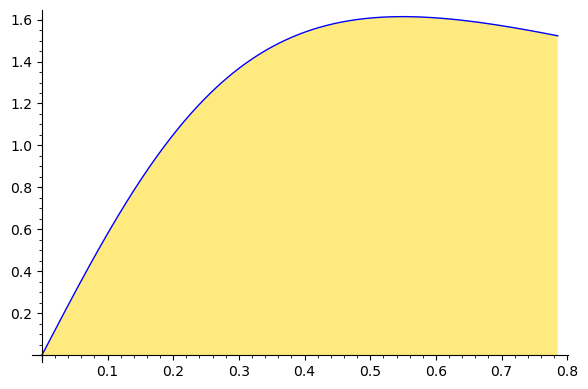

In [18]:
plot(f, xmin=a, xmax = b, fill=True, fillcolor="gold")

Посчитаем значение интеграла

In [19]:
integral_result = numerical_integral(f, a, b)[0]
show(integral_result)

0.9914591670015737

$\text{Воспользуемся методом трапеций.}$

In [25]:
trapeze_result = 0
max_steps = 10

def trapeze(step):
    global value, a, b, f, max_steps, trapeze_result
    trapeze_result = 0
    length = (b-a)/max_steps
    pl = plot(f, xmin=0, xmax=1, ymin=0, ymax=2)
    for i in range(1, step+1):
        l = a + (i-1)*length
        r = a + i*length
        trapeze_result += ((f(x=r)+f(x=l))*length/2).n()
        pl += plot(polygon2d([(l, 0),
                   (r, 0),
                   (r, f(x=r).n()),
                   (l, f(x=l).n())], fill=False, rgbcolor=(255, 0, 0)))
    show(pl)
    show(f'i={step}. trapeze_result = {trapeze_result}')

In [26]:
@interact(step=(0, max_steps, 1))
def _(step=10):
    trapeze(step)

Interactive function <function _ at 0x7fb43589e0d0> with 1 widget
  step: IntSlider(value=10, description='ste…

$\text{Воспользуемся методом прямоугольников}$

In [27]:
rectangle_result = 0
def rectangle(step):
    global value, a, b, f, max_steps, rectangle_result
    rectangle_result = 0
    length = (b-a)/max_steps
    pl = plot(f, xmin=0, xmax=1, ymin=0, ymax=2)
    for i in range(1, step+1):
        l = a + (i-1)*length
        r = a + i*length
        h = (f(x=r)+f(x=l))/2
        rectangle_result += (length*h).n()
        pl += plot(polygon2d([(l, 0),
                   (r, 0),
                   (r, h.n()),
                   (l, h.n())], fill=False, rgbcolor=(255, 0, 0)))
    show(pl)
    show(f'i={step}. rectangle_result = {rectangle_result}')

In [29]:
@interact(step=(0, max_steps, 1))
def _(step=10):
    rectangle(step)

Interactive function <function _ at 0x7fb43571e700> with 1 widget
  step: IntSlider(value=10, description='ste…

Сравним значения

In [32]:
show(integral_result - trapeze_result)

0.00340929833201109

In [33]:
show(integral_result - rectangle_result)

0.00340929833201109

$\text{Значения обоих методов сходятся с точность до 4 знака после запятой.}$